In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
1422068,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,9,app_android,1,4.0,1.0,12.0,1.384186e+09,...,b'\xc6\xe6\xdf\xf5\x9e\xa5a\xa1\x16~\x0e7\xff\...,b'|M(\xc2\xeaD\x8a\xcf\xf9\xf5m\xa0\xfb\x84e\x...,0.399005,Android,1,65.795013,2020-10-13 13:05:00,13,Tuesday,277248
467824,2020-10-18,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,8,web,1,73.0,2.0,127.0,1.812749e+09,...,b'\xc0<\xb9\xa4\x8a^\xfbJ\xf4\x05\xa0YI@\xf9\x...,b'\x8c\xf4\xe9\xaa\xf5Idt\xe9P]\x80\x91\x9d5c[...,0.400979,Android,0,1.000001,2020-10-18 17:29:20,17,Sunday,180000
1394073,2020-10-13,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\x9aMGt\x00\x1a\xf4\xee\x0fS\xe5\x03\xd0\x88...,1,web,1,73.0,1.0,127.0,-7.175378e+08,...,"b""\xe4\xe1\x0b3\xa7~\x0e,<\x9f,\xcc/{\x871{&\x...","b""X\xa9\x10\xd6\xdd\xc1N5F\xd5\xe6{\xef\xd4\xf...",0.203823,Desktop,0,0.126272,2020-10-13 19:40:40,19,Tuesday,90000
5073,2020-10-19,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b't\xf8\x02Jvw\xef\x9e\xb9R\xf0\x1b{%\x96$\x8e...,9,web,1,4.0,2.0,22.0,3.329165e+08,...,b'\x7f@p\xcb\x88\x06G\xea\xe1\xf1\xe8\x92\x8e\...,"b'(2\xb4\xb1""\xedJ\xc97\x0b\xba\xce\xc9a\xce\x...",0.102904,Desktop,0,0.080000,2020-10-19 22:49:30,22,Monday,215600
816178,2020-10-17,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xf4k\x93K{l\xcfK3n\xc2\xa2U.R1\x9a\xd3\xe6H...,8,app_android,2,7.0,0.0,16.0,NaN,...,b'\xd6\xc4\x12\x83\x1ce\x08\x89B~\x14\x04\r?\x...,b'\xe5\xe30\x8b\xa6\x96\xf2\x8a\x12\xc7(b<\xa7...,0.140907,Android,0,0.008548,2020-10-17 18:38:40,18,Saturday,16000
705799,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,5,web,1,73.0,1.0,127.0,4.148174e+08,...,b'\xfe\x82\x88\xe2`Z\x93XQ\x85g\xbej\\W\xfa\x9...,b'\xbb\xc94_\xa6\xe5\xa6\x15\x19/b\xdf\xe8i\x8...,0.596070,Desktop,0,0.573599,2020-10-13 11:16:10,11,Tuesday,242500
1154566,2020-10-14,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,6,web,1,4.0,1.0,12.0,-2.327217e+08,...,"b',f""\x00\xbe\x8fg\xcf\xbb\xe4eCB\xcc\x14\x97\...",b'q28V5sS5U\x17\xc6(\x9e\xad\x0b8u\xc2\x0f\x8b...,0.245278,Desktop,0,0.101000,2020-10-14 16:24:00,16,Wednesday,65520
1295218,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,5,web,1,4.0,2.0,12.0,-1.522435e+09,...,"b'\xc1\xae\xd4\xb1\x0bW(,6\xa4\xb2\xf3\x7f\x07...",b'm\xb2\xdf/\x14]W1\x1d\xb3\xd6\xac\xc6G\x0c\x...,0.141346,Android,0,1.000000,2020-10-13 19:01:30,19,Tuesday,75000
198781,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,5,web,1,74.0,0.0,127.0,-2.327217e+08,...,"b""\xec%1l{\xb6I'3o\xa7\xe4\x1b\xe4\x9bVM\xe2\x...",b'P\xfd>\x19\x1d\xb1\xd6\x11\x00Y\xc4\xf9/\xaf...,0.088423,Desktop,0,0.025645,2020-10-19 10:52:30,10,Monday,0
923884,2020-10-15,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,7,web,1,74.0,0.0,127.0,-1.522435e+09,...,b'\xc2\xb2\\\xea\xf9\x9fh\xdd\xd89M\x9b7q\x00Y...,b'\xf3r\xb5\xb7\xc8=t\xba\x02C\xf6|\x06\xf9\xd...,0.400480,Desktop,0,0.059574,2020-10-15 08:48:00,8,Thursday,0


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

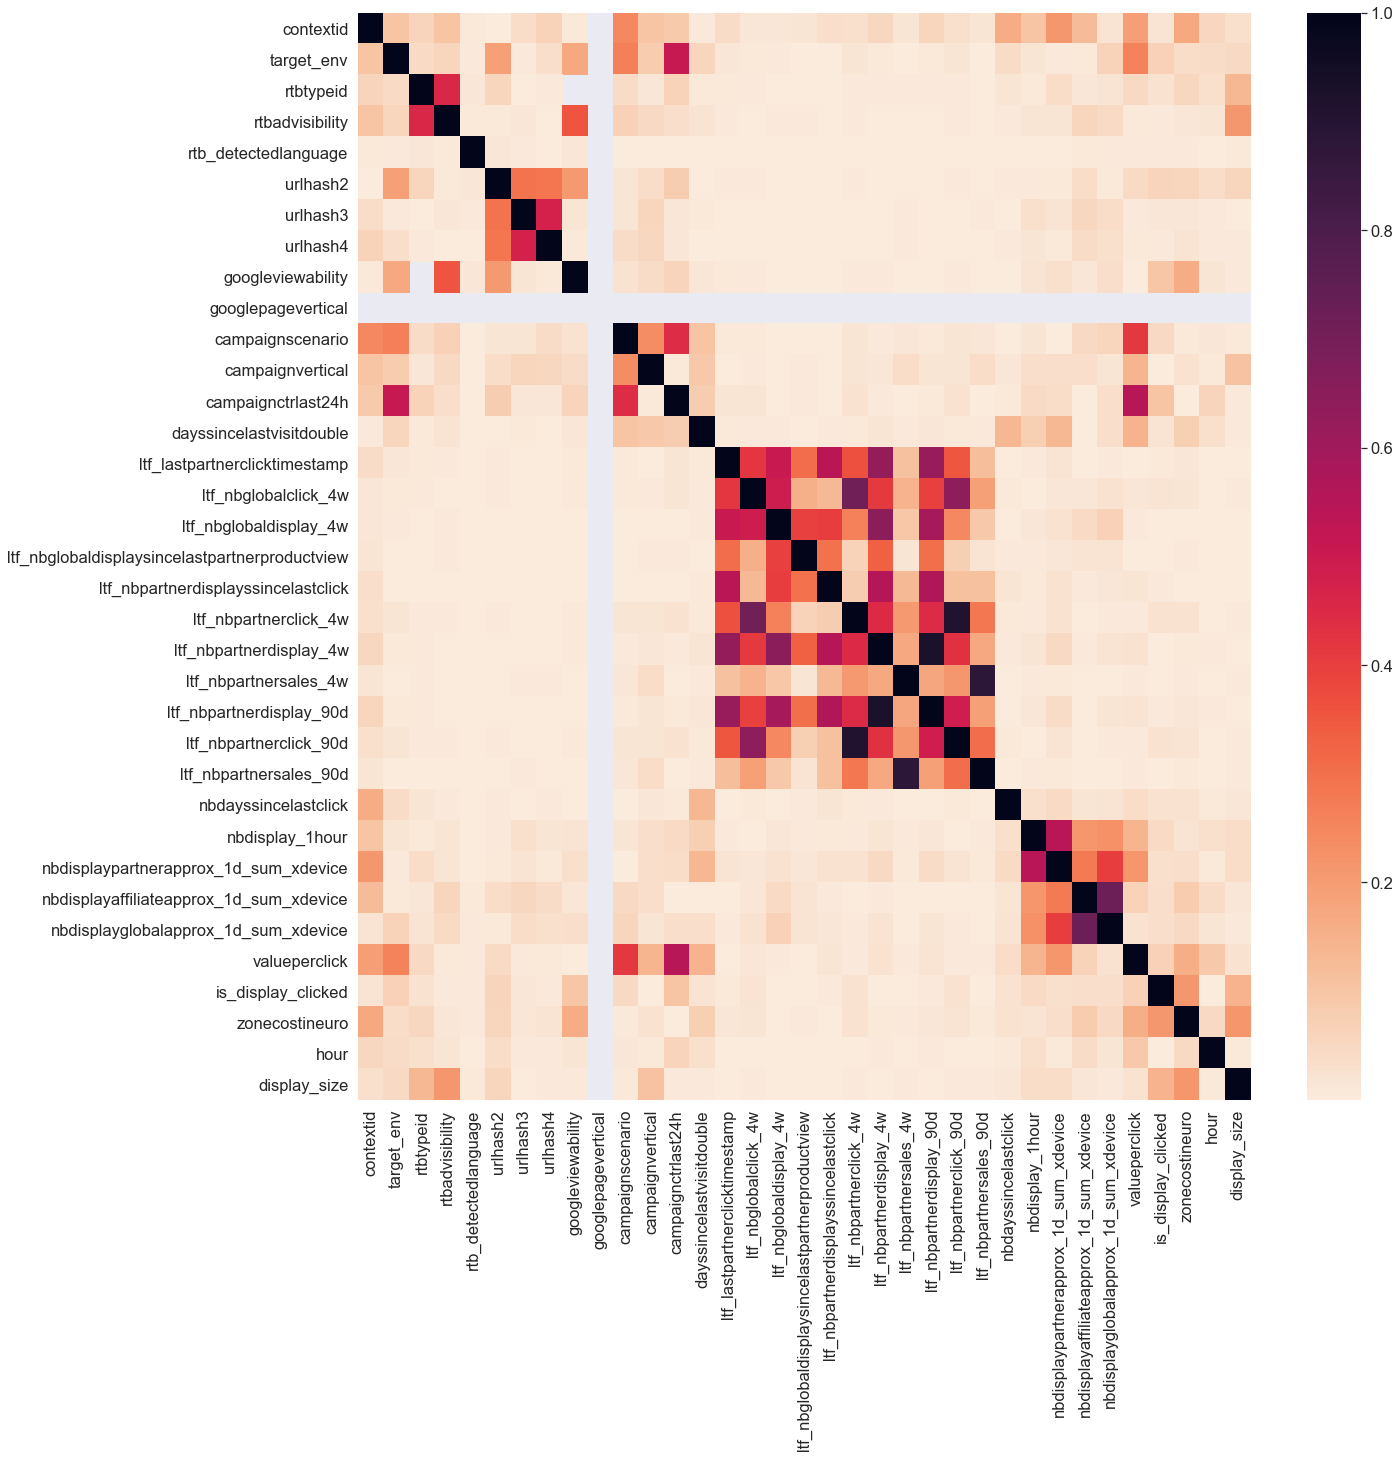

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

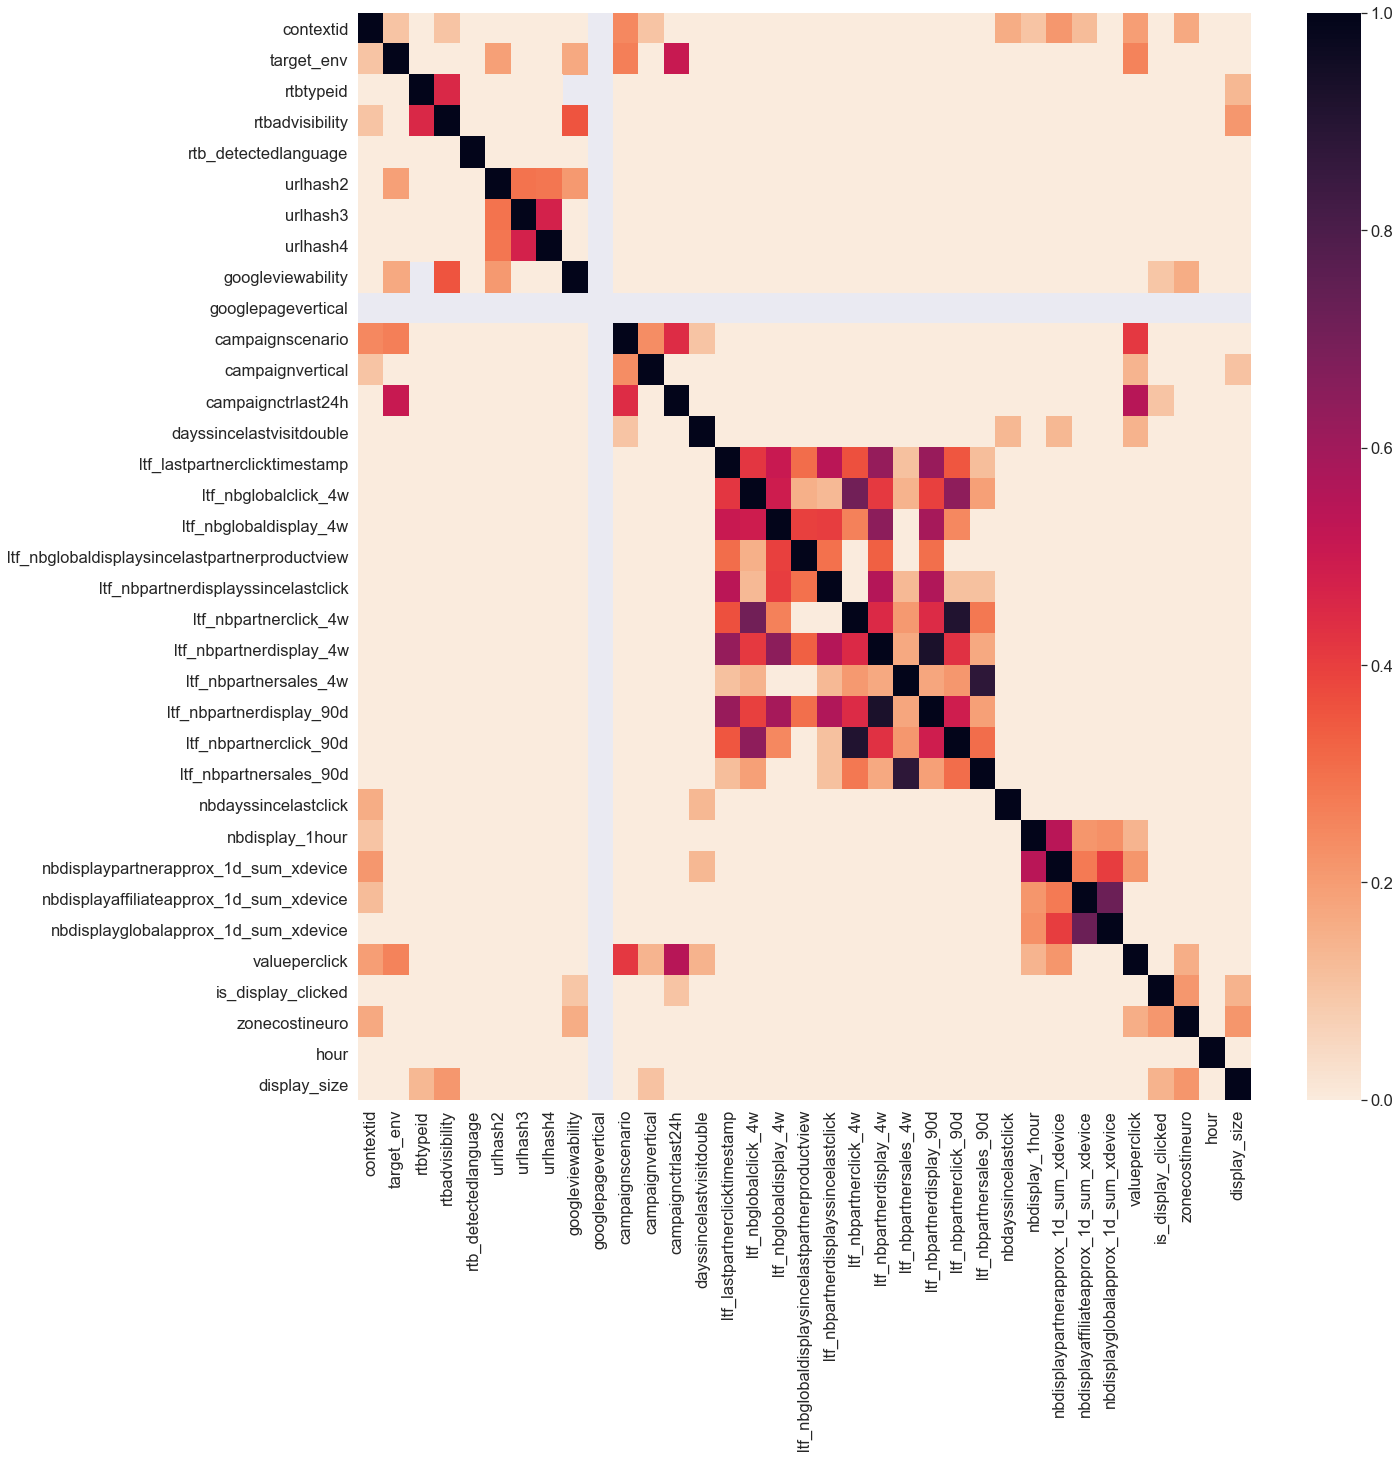

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.1 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10, moyenne=True):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas if moyenne else j
    return discrete_var

In [7]:
def ratio_plot(variable, zoom=False):
    """
    Trace la proportion de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Proportion de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()
    plt.style.use('default')

In [8]:
def ratios_plot(variables):
    """
    Trace sur un même graphique les proportion de clics selon les variables de
    la liste 'variables' dans df.
    """
    ratios = []
    mini = float('inf')
    maxi = - float('inf')
    for variable in variables:
        clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
        notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
        ratio = clicked / (clicked + notclicked)
        m, M = ratio.min(), ratio.max()
        if m < mini:
            mini = m
        if M > maxi:
            maxi = M
        ratios.append(ratio)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=0)
    
    ax.set_ylim(mini - 0.05*(maxi-mini), maxi + 0.05*(maxi-mini))
    
    for i, ratio in enumerate(ratios):
        ratio.plot(ax=ax, label=variables[i], marker='x', legend=True)
    
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title("Proportion de clics en fonction des variables")
    ax.set_xlabel("Modalités croissantes des variables")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()

In [9]:
def stacked_barplot(column):
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

In [10]:
# ratio_plot("contextid")

In [11]:
# stacked_barplot('contextid')

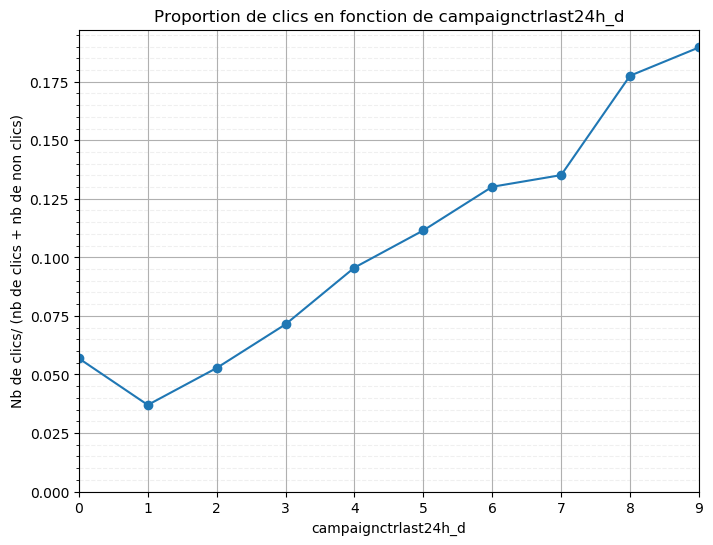

Wall time: 1min 16s


In [12]:
%%time
df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
ratio_plot("campaignctrlast24h_d")

In [13]:
# df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
# ratio_plot("ltf_lastpartnerclicktimestamp_d")

In [14]:
# df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
# ratio_plot("ltf_nbpartnersales_4w_d")

In [15]:
# df["display_size_discrete"] = to_discrete(df["display_size"], moyenne=False)
# ratio_plot("display_size_discrete")

In [16]:
%%time

df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
df['dayssincelastvisitdouble_d'] = to_discrete(df["dayssincelastvisitdouble"], moyenne=False)
df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
df["nbdayssincelastclick_d"] = to_discrete(df["nbdayssincelastclick"], moyenne=False)
df["nbdisplay_1hour_d"] = to_discrete(df["nbdisplay_1hour"], moyenne=False)
df["valueperclick_d"] = to_discrete(df["valueperclick"], moyenne=False)
df["zonecostineuro_d"] = to_discrete(df["zonecostineuro"], moyenne=False)
df["display_size_d"] = to_discrete(df["display_size"], moyenne=False)


Wall time: 7min 46s


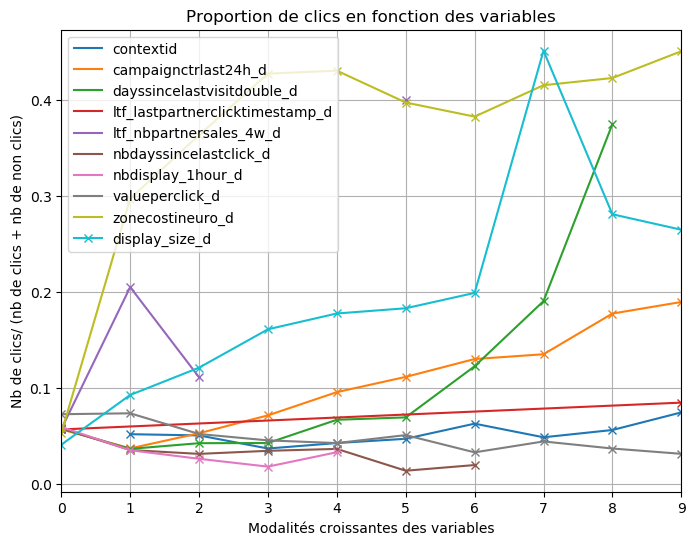

In [17]:
ratios_plot(['contextid', 'campaignctrlast24h_d', 'dayssincelastvisitdouble_d', 'ltf_lastpartnerclicktimestamp_d', 'ltf_nbpartnersales_4w_d', 'nbdayssincelastclick_d', 'nbdisplay_1hour_d', 'valueperclick_d', 'zonecostineuro_d', 'display_size_d'])

In [18]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

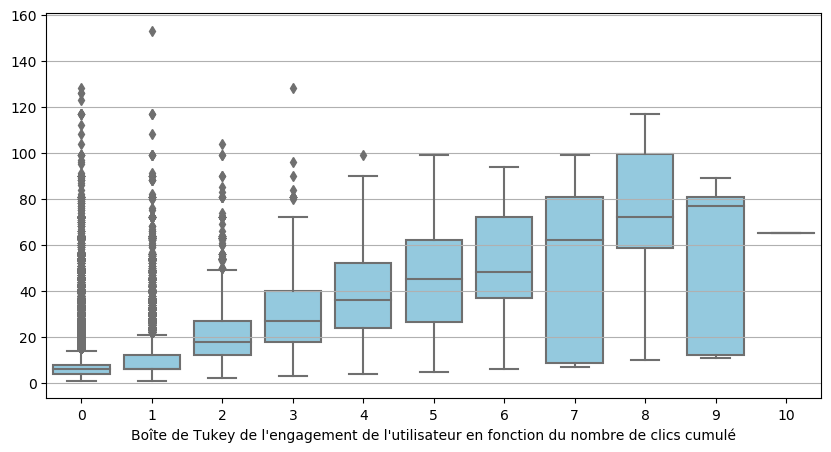

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

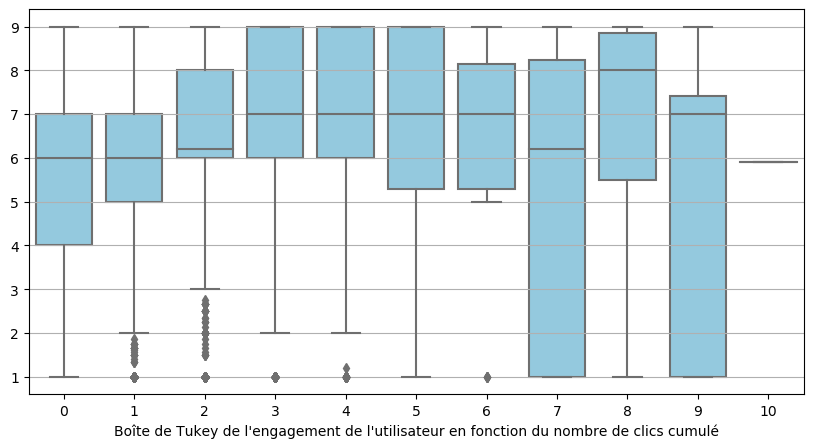

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

# Bots

Calcul du nombre de clics par utilisateurs

In [21]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
b'\xdc)W\x0b|\xe4\xf1\xb9`\xf7\x8f\x11\x16\xf5\x8a\x81\xbcktZG\xb1\xff\xd2\xca\x1a\xaeA\x90z[W',9
b'\xe5\xd4A\xa7T(y\x1a\x12d\x8a\xfb\xc7\x03\xe6j\x0e\xa6-.C\xbd\x1b\x10+%\xf9\xdf\x9d\xd2`\xdd',8
b'\xa86b\xf7+\xacp\xb2\xb1\x11\x069\xfef\xcb\xc0\xc9T\xcd\xe7Ei\r\x9fK\x8c\xf1e\x15 S@',8
b'\xfbi\r\x90\x12\xab\xba\x95\xab\xf8\x8d\x16\xbbh\xc3\xe7\xe7\xb4\x85|\xb1\n\x0f\xf2\xe9\xdb\xe0?\x8c?I4',8


In [22]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9,81,9,9.000000
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9,12,12,1.000000
b'\xdc)W\x0b|\xe4\xf1\xb9`\xf7\x8f\x11\x16\xf5\x8a\x81\xbcktZG\xb1\xff\xd2\xca\x1a\xaeA\x90z[W',9,89,12,7.416667
b'\xe5\xd4A\xa7T(y\x1a\x12d\x8a\xfb\xc7\x03\xe6j\x0e\xa6-.C\xbd\x1b\x10+%\xf9\xdf\x9d\xd2`\xdd',8,72,8,9.000000
b'\xa86b\xf7+\xacp\xb2\xb1\x11\x069\xfef\xcb\xc0\xc9T\xcd\xe7Ei\r\x9fK\x8c\xf1e\x15 S@',8,45,9,5.000000
b'\xfbi\r\x90\x12\xab\xba\x95\xab\xf8\x8d\x16\xbbh\xc3\xe7\xe7\xb4\x85|\xb1\n\x0f\xf2\xe9\xdb\xe0?\x8c?I4',8,72,12,6.000000


In [23]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
b'-U\x87^\xe4cxaDm\xac\xdc\xfd~B(7.\x9e\xdd\x8c_\xac \xce\xcf%\xf5S\xa0\xe4\xd0',9
"b""\xbaI`\x80\xf3\x0b\xa4\xbc\x84'\x1f\xdeA\xecv\xbb\xa6:W\xf3\xe8\xcb\xf6~L\x91\xfeS\x90q\xcb~""",9
b'\x94\x80\xba$\xf7\xcf\x17-#\x9e{\x10\xdd\xa1\xa4\xc2\x86\x86\xf3\xd1\xb2\xf7\x005\xb6\xf2\xef\xdc\xa6\x1a&x',8
b'\xef[E\xf1*a\xc1l\x14O\xd2\xdd\x1e\xa5(i\xa0\x80f\xa5X\xd7\xedq\xd0R\x1d\x97\x10\xd9\xca;',8


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

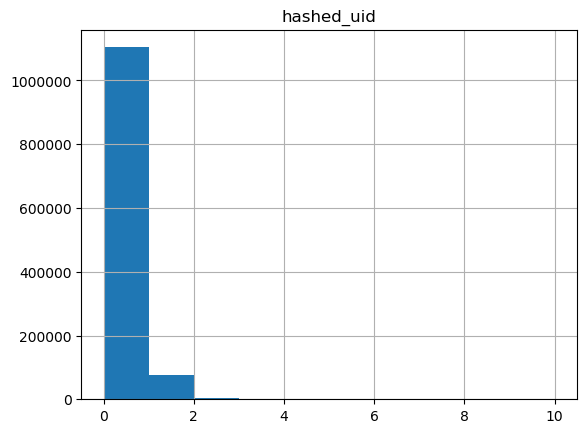

In [24]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

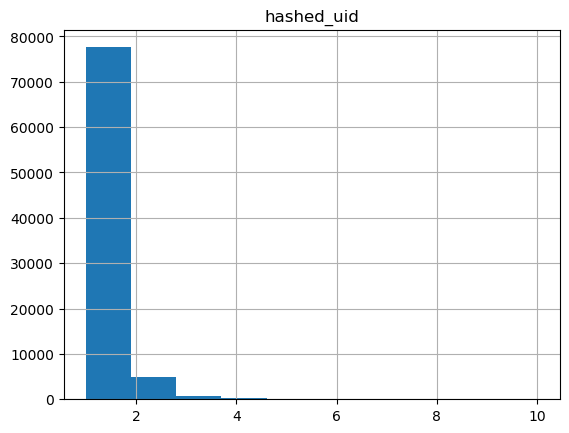

In [25]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

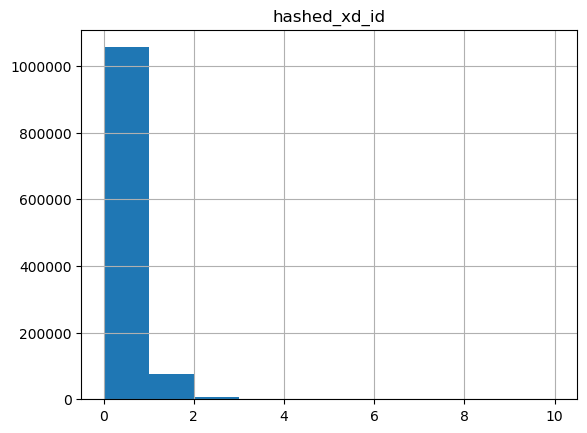

In [26]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

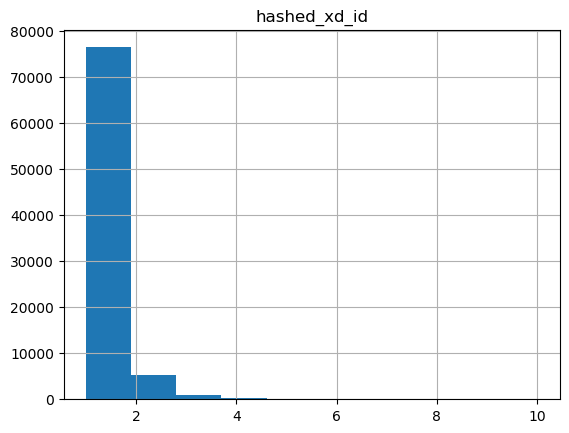

In [27]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [28]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.002975
rtbadvisibility                                   0.002975
rtb_detectedlanguage                              0.002975
urlhash2                                          0.094472
urlhash3                                          0.094472
urlhash4                                          0.094472
user_country                                      0.000174
hashed_affiliateid                                0.000000
hashed_app_id                                     0.324941
googleviewability                                 0.618809
googlepagevertical                                0.0029

## Timestamp

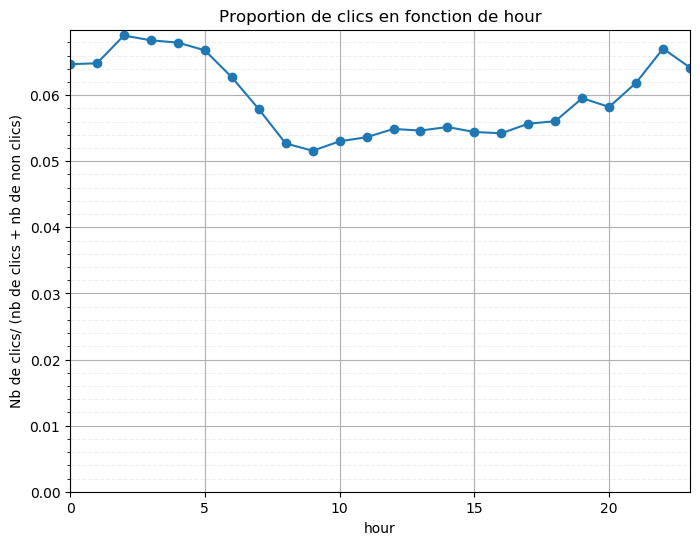

In [29]:
ratio_plot("hour")

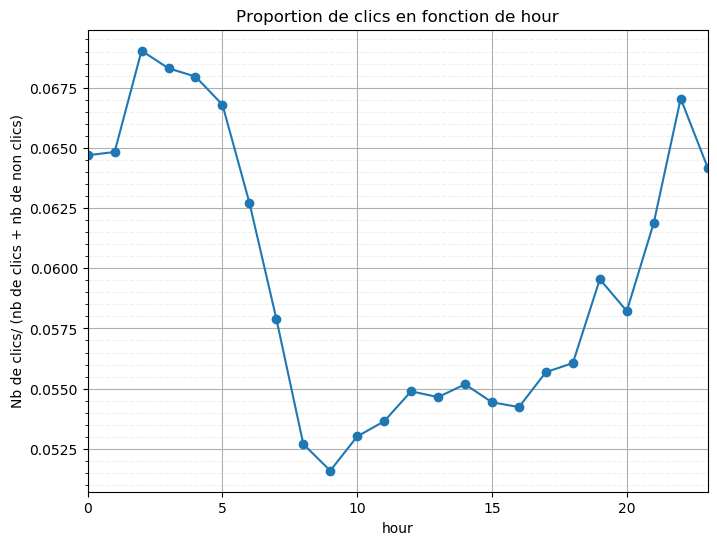

In [30]:
ratio_plot("hour", zoom=True)

In [31]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,display_size,campaignctrlast24h_d,dayssincelastvisitdouble_d,ltf_lastpartnerclicktimestamp_d,ltf_nbpartnersales_4w_d,nbdayssincelastclick_d,nbdisplay_1hour_d,valueperclick_d,zonecostineuro_d,display_size_d
1422068,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,9,app_android,1,4.0,1.0,12.0,1.384186e+09,...,277248,1.0,0.0,9.0,0.0,0.0,0.0,4.0,6.0,2.0
467824,2020-10-18,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,8,web,1,73.0,2.0,127.0,1.812749e+09,...,180000,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1394073,2020-10-13,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\x9aMGt\x00\x1a\xf4\xee\x0fS\xe5\x03\xd0\x88...,1,web,1,73.0,1.0,127.0,-7.175378e+08,...,90000,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5073,2020-10-19,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b't\xf8\x02Jvw\xef\x9e\xb9R\xf0\x1b{%\x96$\x8e...,9,web,1,4.0,2.0,22.0,3.329165e+08,...,215600,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
816178,2020-10-17,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xf4k\x93K{l\xcfK3n\xc2\xa2U.R1\x9a\xd3\xe6H...,8,app_android,2,7.0,0.0,16.0,NaN,...,16000,5.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


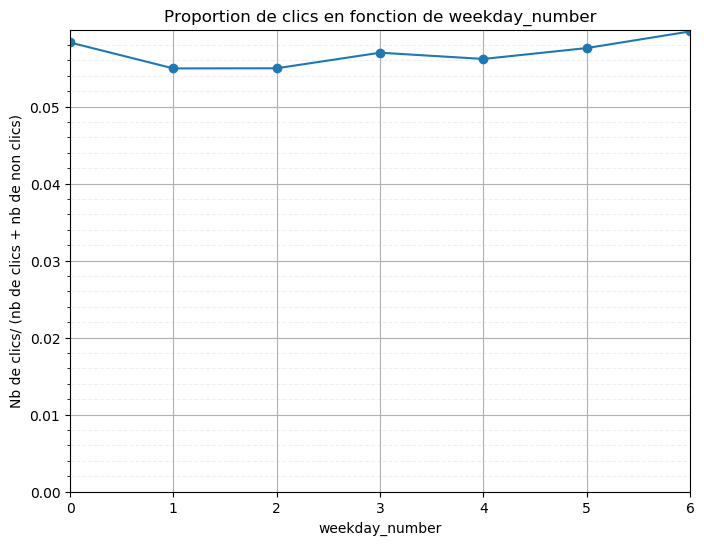

In [32]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

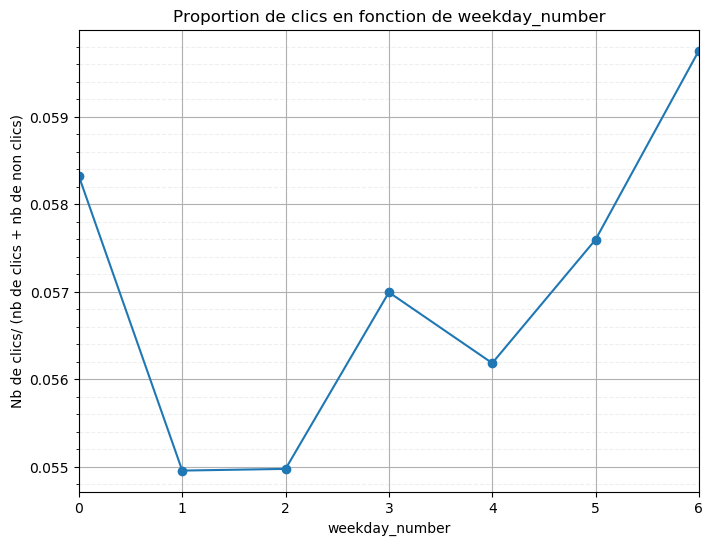

In [33]:
ratio_plot("weekday_number", zoom=True)

In [34]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:11:19
